## Demo of NLP functionality
Here we describe some of the available tools to help you with nlp tasks.

### Annotations to POS / IOB Format

`AnnotationBuilder` provides various functionality for dealing with annotations

In [1]:
import os
os.chdir("/Users/vtshitoyan/dev/TRI/matstract")

from matstract.models.AnnotationBuilder import AnnotationBuilder
builder = AnnotationBuilder()
annotations = builder.get_annotations(user=None)  # you can specify the user_key to get annotations of specific user

`annotations` is a list of `Annotation` objects containing all relevant annotaiton information. You can use the `to_iob()` method to get part of speech tags and IOB annotation used for named entity recognition

In [34]:
iob, iob_str = annotations[0].to_iob()
print(iob[0])

[('The', 'DT', 'O'), ('effect', 'NN', 'O'), ('of', 'IN', 'O'), ('oxygen', 'NN', 'B-PRO'), ('nonstoichiometry', 'NN', 'I-PRO'), ('of', 'IN', 'O'), ('BaBi1', 'NN', 'B-MAT'), ('−', 'HYPH', 'I-MAT'), ('x', 'NN', 'I-MAT'), ('Pb', 'NN', 'I-MAT'), ('x', 'CC', 'I-MAT'), ('O3', 'NN', 'I-MAT'), ('−', 'HYPH', 'I-MAT'), ('δ', 'NN', 'I-MAT'), ('on', 'IN', 'O'), ('electrical', 'JJ', 'B-PRO'), ('conduction', 'NN', 'I-PRO'), ('behaviour', 'NN', 'O')]


You can also print the results as a plain string, which might be useful for portability

In [35]:
print(iob_str)

The DT O
effect NN O
of IN O
oxygen NN B-PRO
nonstoichiometry NN I-PRO
of IN O
BaBi1 NN B-MAT
− HYPH I-MAT
x NN I-MAT
Pb NN I-MAT
x CC I-MAT
O3 NN I-MAT
− HYPH I-MAT
δ NN I-MAT
on IN O
electrical JJ B-PRO
conduction NN I-PRO
behaviour NN O

The DT O
dependence NN O
of IN O
oxygen NN B-PRO
deficiency NN I-PRO
, , O
δ NN B-PRO
, , O
of IN O
BaBi1 NN B-MAT
− HYPH I-MAT
xPbxO3 NN I-MAT
− HYPH I-MAT
δ NN I-MAT
on IN O
temperature NN B-CON
, , O
T NN B-CON
, , O
and CC O
oxygen NN B-CON
partial JJ I-CON
pressure NN I-CON
, , O
Po2 NN B-CON
, , O
was VBD O
investigated VBN O
by IN O
thermogravimetry NN O
. . O

A DT O
linear JJ O
relationship NN O
with IN O
proportionality NN B-PRO
constant JJ I-PRO
about IN O
− HYPH B-PVL
1 CD I-PVL
2 CD I-PVL
between IN O
log NN O
δ NN B-PRO
and CC O
log NN O
pO2 NN B-CON
observed VBN O
for IN O
the DT O
specimens NNS O
with IN O
x NN B-PRO
= JJ O
0.25 CD B-PVL
, , O
0.5 CD B-PVL
and CC O
0.75 CD B-PVL
suggested VBD O
that IN O
effective JJ B-PRO
concentrat

### Annotation Agreement Estimates

`AnnotationMetrics` provides a few useful tools for estimating inter-annotator agreement

In [2]:
from matstract.nlp.annotation_metrics import AnnotationMetrics
am = AnnotationMetrics()

You can extract the [Cohen Kappa Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html) using `cohen_kappa` method

In [4]:
# you can specify a list of labels and annotations
kappa, kappaStd, existing_labels = am.cohen_kappa(labels=None, annotators=None)
print("Inter-annotator agreement is {:.2f} +/- {:.2f} %".format(kappa, kappaStd))

Inter-annotator agreement is 0.84 +/- 0.08 %


You can also get the similarity matrix across different labels

/Users/vtshitoyan/dev/TRI/matstract/matstract/nlp/utils.py:15: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/Users/vtshitoyan/anaconda3/envs/matstract-dev/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


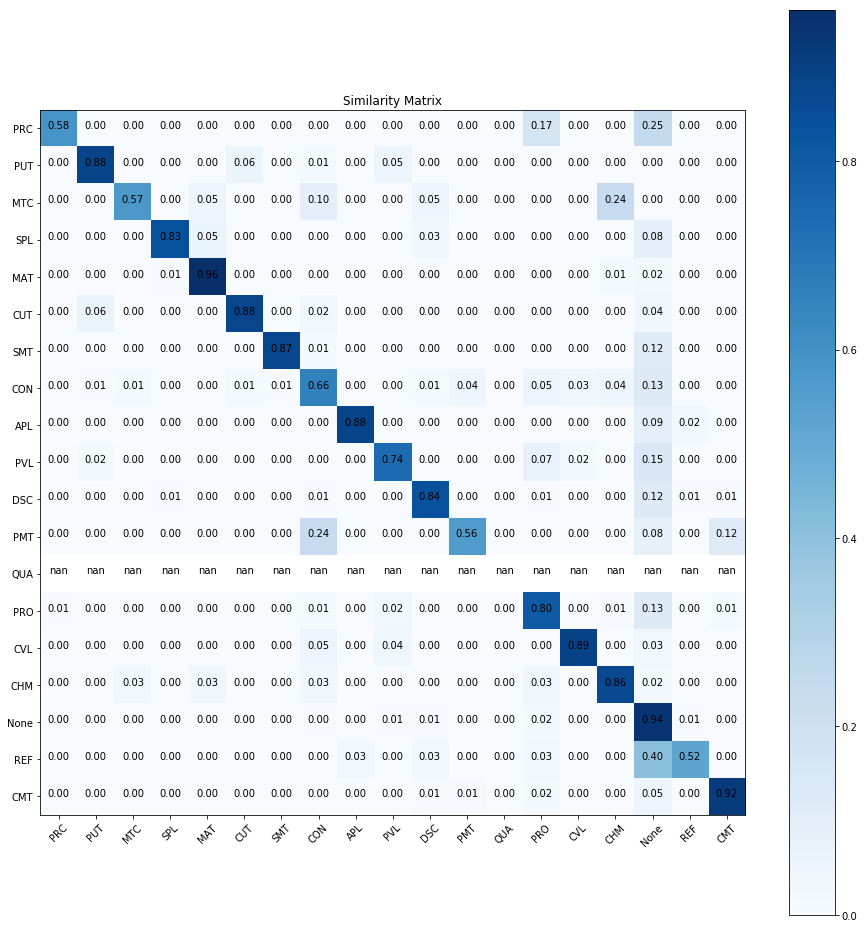

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matstract.nlp.utils import plot_matrix

similarity_matrix, labels = am.similarity_matrix()
plt.figure(figsize=(13,13))
plot_matrix(similarity_matrix, labels, normalize=True, title="Similarity Matrix")

A list of accuracies for different labels can be obtained

In [7]:
am.accuracies()

/Users/vtshitoyan/dev/TRI/matstract/matstract/nlp/annotation_metrics.py:111: RuntimeWarning: invalid value encountered in double_scalars
  accuracies[label] = similarity_matrix[i, i] / np.nansum(similarity_matrix[i, :])


{'APL': 0.7876712328767124,
 'CHM': 0.6752577319587629,
 'CMT': 0.8569169960474309,
 'CON': 0.5769230769230769,
 'CUT': 0.7553956834532374,
 'CVL': 0.752,
 'DSC': 0.7070914696813977,
 'MAT': 0.7956403269754768,
 'MTC': 0.6101694915254238,
 'None': 0.8962917798348207,
 'PMT': 0.4155844155844156,
 'PRC': 0.464,
 'PRO': 0.6835886214442013,
 'PUT': 0.7242524916943521,
 'PVL': 0.6026058631921825,
 'QUA': nan,
 'REF': 0.43874643874643876,
 'SMT': 0.7912772585669782,
 'SPL': 0.569620253164557}